In [97]:
install.packages('gridExtra')

library(rjags)
library(coda)
library(tidyverse)
library(gridExtra)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
# install.packages('gridExtra')
# install.packages('emdbook')
# install.packages('ramify')

# library(tidyverse)
# library(gridExtra)
# library(emdbook)
# library(ramify)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘ramify’


The following object is masked from ‘package:purrr’:

    flatten


The following object is masked from ‘package:tidyr’:

    fill


The following object is masked from ‘package:graphics’:

    clip




# Ex.1

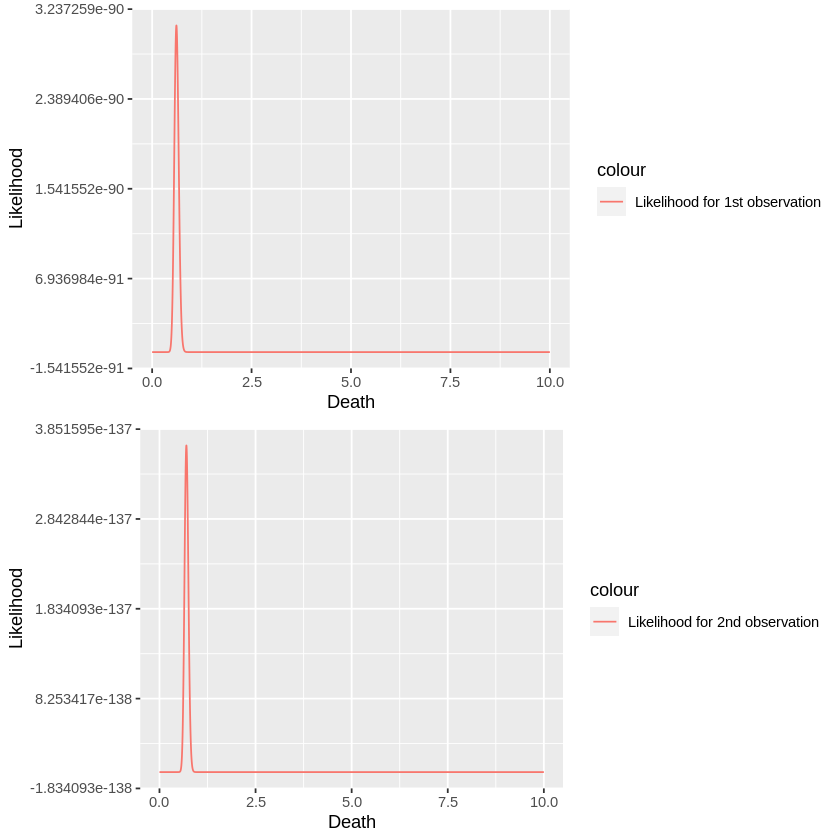

In [74]:
# two observation
n_1 <- c(rep(0, times=109), rep(1, times = 65), rep(2, times=22), rep(3, times=3), rep(4, times=1))
n_2 <- c(rep(0, times=144), rep(1, times = 91), rep(2, times=32), rep(3, times=11), rep(4, times=2))

delta.t <- 0.001
lambda_list <- seq(from=0, to=10, by=delta.t)
#likelihood for the two observation are both poisson
pois <- function(n_i, lambda_list){
            p_i_like <- 1 #rep(1, times = length(lambda_list))
            for (n in n_i){
                p_i_like <- p_i_like * dpois(x=n, lambda=lambda_list)
                }
            return(p_i_like)
            }

#compute the two likelihood separatly for the two observation
p_1_like <- pois(n_1,  lambda_list)
p_2_like <- pois(n_2,  lambda_list)


#plot
ggplot() +
geom_line(aes(lambda_list, p_1_like, color='Likelihood for 1st observation')) +
labs(x='Death', y='Likelihood') -> plot_like_1

ggplot() +
geom_line(aes(lambda_list, p_2_like, color='Likelihood for 2nd observation')) +
labs(x='Death', y='Likelihood') -> plot_like_2

grid.arrange(grobs=list(plot_like_1, plot_like_2), nrow=2)


(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

,mean,variance,lower_bound_credibility_interval,upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
First obseration,0.6150000,0.003075000,0.508,0.724
Second observation,0.7035714,0.002512755,0.607,0.802


Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”


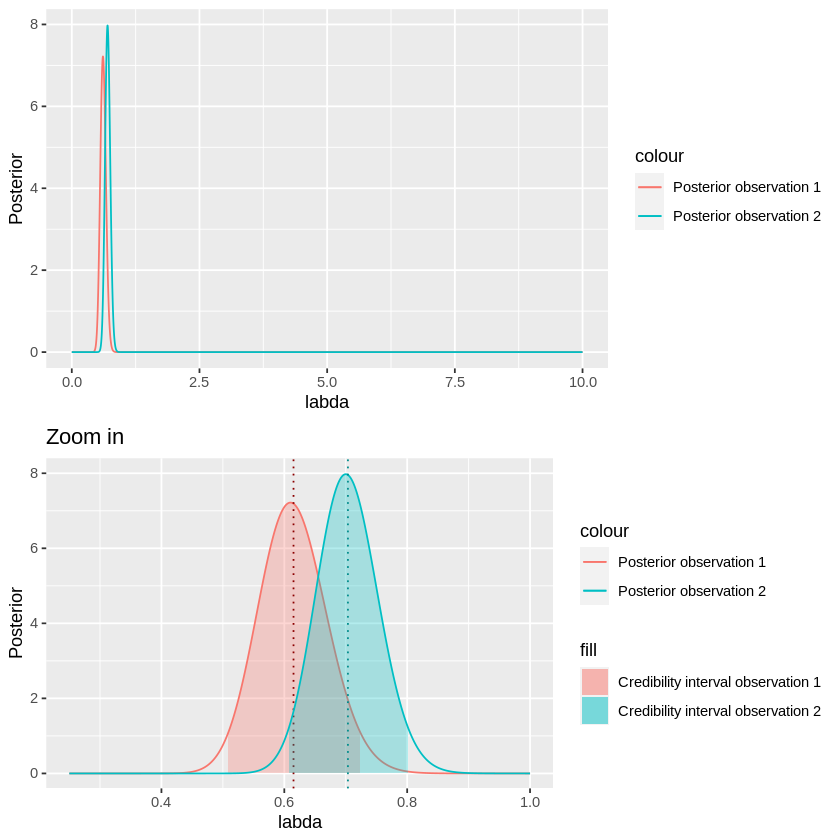

In [34]:
#posterior with uniform prior
p.post_star_unif_1 <- p_1_like * 1 #dunif(lambda_list, min = min(lambda_list), max=max(lambda_list))#non normalized posterior
p.post_unif_1 <- p.post_star_unif_1 / (sum(p.post_star_unif_1)*delta.t)
mean_unif_1 <- sum(p.post_unif_1 * lambda_list)*delta.t
variance_unif_1 <- sum(((mean_unif_1-lambda_list)^2)*p.post_unif_1)*delta.t
lower_unif_1 <- ncredint(lambda_list, p.post_unif_1, level = 0.95)[['lower']]
upper_unif_1 <- ncredint(lambda_list, p.post_unif_1, level = 0.95)[['upper']]


p.post_star_unif_2 <- p_2_like * 1 #dunif(lambda_list, min = min(lambda_list), max=max(lambda_list)) #non normalized posterior
p.post_unif_2 <- p.post_star_unif_2 / (sum(p.post_star_unif_2)*delta.t)
mean_unif_2 <- sum(p.post_unif_2 * lambda_list)*delta.t
variance_unif_2 <- sum(((mean_unif_2-lambda_list)^2)*p.post_unif_2)*delta.t
lower_unif_2 <- ncredint(lambda_list, p.post_unif_2, level = 0.95)[['lower']]
upper_unif_2 <- ncredint(lambda_list, p.post_unif_2, level = 0.95)[['upper']]


result_unif <- data.frame(
                mean = c(mean_unif_1, mean_unif_2), 
                variance = c(variance_unif_1, variance_unif_2),
                lower_bound_credibility_interval = c(lower_unif_1, lower_unif_2),
                upper_bound_credibility_interval = c(upper_unif_1, upper_unif_2),
                row.names = c('First obseration', 'Second observation')
                )
result_unif


#plot
ggplot() +
geom_line(aes(lambda_list, p.post_unif_1, color='Posterior observation 1')) +
geom_line(aes(lambda_list, p.post_unif_2, color='Posterior observation 2')) +
labs(x='labda',y ='Posterior', title='Uniform prior')-> plot_posterior_unif

ggplot() +
geom_line(aes(lambda_list, p.post_unif_1, color='Posterior observation 1')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_unif_1 & lambda_list < upper_unif_1], 
              y = p.post_unif_1[lambda_list > lower_unif_1 & lambda_list < upper_unif_1],
              fill='Credibility interval observation 1'), alpha=0.3) +
geom_vline(aes(xintercept=mean_unif_1), color='darkRed', linetype='dotted')+


geom_line(aes(lambda_list, p.post_unif_2, color='Posterior observation 2')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_unif_2 & lambda_list < upper_unif_2], 
              y = p.post_unif_2[lambda_list > lower_unif_2 & lambda_list < upper_unif_2],
              fill='Credibility interval observation 2'), alpha=0.3) +
geom_vline(aes(xintercept=mean_unif_2), color='darkCyan', linetype='dotted') +

labs(x='labda',y ='Posterior', title='Zoom in') +
ylim(0, 8) +
xlim(0.25, 1) -> plot_posterior_unif_zoom

grid.arrange(grobs=list(plot_posterior_unif, plot_posterior_unif_zoom))

,mean,variance,lower_bound_credibility_interval,upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
First obseration,0.6125000,0.003062500,0.5061,0.7211
Second observation,0.7017857,0.002506378,0.6051,0.8001


Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”


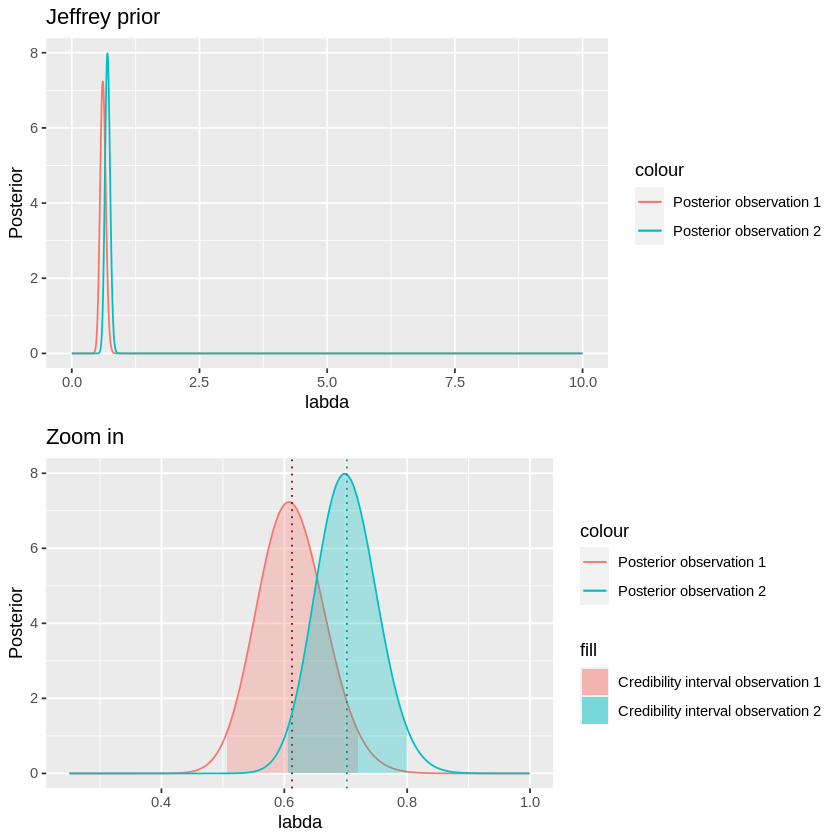

In [36]:
#posterior with Jeffrey prior
lambda_list <- seq(from=0.0001, to=10, by=delta.t)
p_1_like <- pois(n_1,  lambda_list)
p_2_like <- pois(n_2,  lambda_list)


p.post_star_Jeffrey_1 <- p_1_like * (1/sqrt(lambda_list))#non normalized posterior
p.post_Jeffrey_1 <- p.post_star_Jeffrey_1 / (sum(p.post_star_Jeffrey_1)*delta.t)
mean_Jeffrey_1 <- sum(p.post_Jeffrey_1 * lambda_list)*delta.t
variance_Jeffrey_1 <- sum(((mean_Jeffrey_1-lambda_list)^2)*p.post_Jeffrey_1)*delta.t
lower_Jeffrey_1 <- ncredint(lambda_list, p.post_Jeffrey_1, level = 0.95)[['lower']]
upper_Jeffrey_1 <- ncredint(lambda_list, p.post_Jeffrey_1, level = 0.95)[['upper']]


p.post_star_Jeffrey_2 <- p_2_like * (1/sqrt(lambda_list)) #non normalized posterior
p.post_Jeffrey_2 <- p.post_star_Jeffrey_2 / (sum(p.post_star_Jeffrey_2)*delta.t)
mean_Jeffrey_2 <- sum(p.post_Jeffrey_2 * lambda_list)*delta.t
variance_Jeffrey_2 <- sum(((mean_Jeffrey_2-lambda_list)^2)*p.post_Jeffrey_2)*delta.t
lower_Jeffrey_2 <- ncredint(lambda_list, p.post_Jeffrey_2, level = 0.95)[['lower']]
upper_Jeffrey_2 <- ncredint(lambda_list, p.post_Jeffrey_2, level = 0.95)[['upper']]


result_unif <- data.frame(
                mean = c(mean_Jeffrey_1, mean_Jeffrey_2), 
                variance = c(variance_Jeffrey_1, variance_Jeffrey_2),
                lower_bound_credibility_interval = c(lower_Jeffrey_1, lower_Jeffrey_2),
                upper_bound_credibility_interval = c(upper_Jeffrey_1, upper_Jeffrey_2),
                row.names = c('First obseration', 'Second observation')
                )
result_unif


#plot
ggplot() +
geom_line(aes(lambda_list, p.post_Jeffrey_1, color='Posterior observation 1')) +
geom_line(aes(lambda_list, p.post_Jeffrey_2, color='Posterior observation 2')) +
labs(x='labda', y ='Posterior', title='Jeffrey prior')-> plot_posterior_Jeffrey

ggplot() +
geom_line(aes(lambda_list, p.post_Jeffrey_1, color='Posterior observation 1')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey_1 & lambda_list < upper_Jeffrey_1], 
              y = p.post_Jeffrey_1[lambda_list > lower_Jeffrey_1 & lambda_list < upper_Jeffrey_1],
              fill='Credibility interval observation 1'), alpha=0.3) +
geom_vline(aes(xintercept=mean_Jeffrey_1), color='darkRed', linetype='dotted')+


geom_line(aes(lambda_list, p.post_Jeffrey_2, color='Posterior observation 2')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey_2 & lambda_list < upper_Jeffrey_2], 
              y = p.post_Jeffrey_2[lambda_list > lower_Jeffrey_2 & lambda_list < upper_Jeffrey_2],
              fill='Credibility interval observation 2'), alpha=0.3) +
geom_vline(aes(xintercept=mean_Jeffrey_2), color='darkCyan', linetype='dotted') +

labs(x='labda',y ='Posterior', title='Zoom in') +
ylim(0, 8) +
xlim(0.25, 1) -> plot_posterior_Jeffrey_zoom

grid.arrange(grobs=list(plot_posterior_Jeffrey, plot_posterior_Jeffrey_zoom))

# Ex.2

solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functions
introduced during lectures, or using a MCM library like JAGS.

(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

In [4]:
#data
data <- NULL
data$X <- n_1
data$n_next <- 10

#create the jags model 
model <- 's11_inf_p_lambda_pred.bug'
jm <- jags.model(model, data)

Warning message in jags.model(model, data):
“Unused variable "n_next" in data”

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 203

Initializing model




Iterations = 34001:44000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.6209 0.79690 0.0079690      0.0079690
lambda 0.6151 0.05591 0.0005591      0.0005591

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
Y      0.0000 0.0000 0.0000 1.0000 3.0000
lambda 0.5104 0.5764 0.6134 0.6519 0.7297



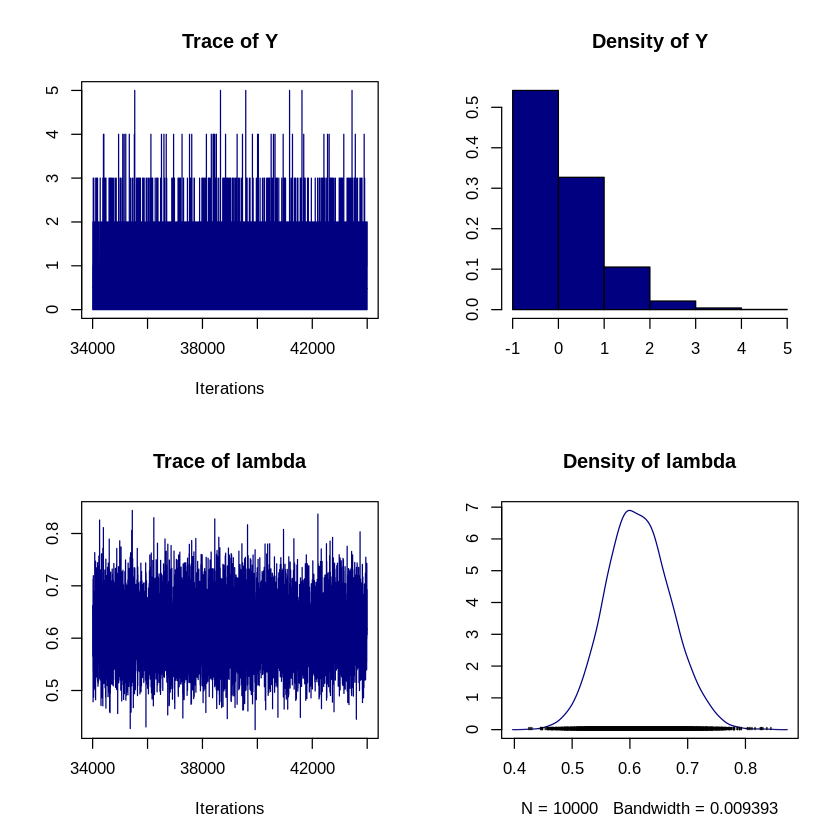

In [18]:
#update the Markov chain (burn-in)
update(jm, 1000)
chain <- coda.samples(jm, c('lambda','Y'), n.iter=10000)
print(summary(chain))
plot(chain, col='navy')

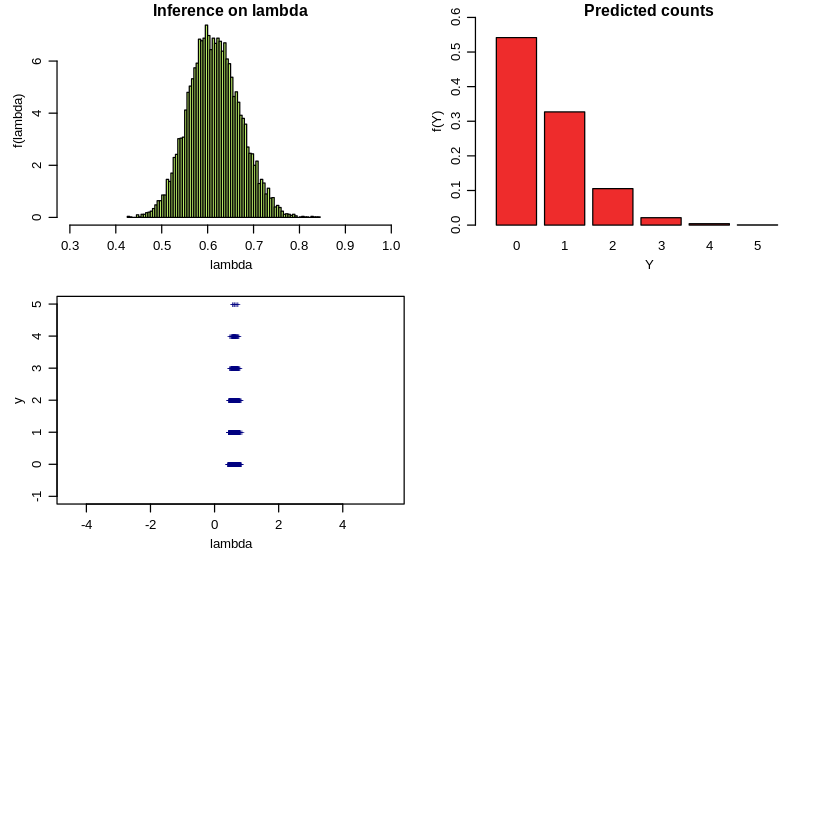

In [25]:
#format the chain
chain.df <- as.data.frame(as.mcmc(chain))

#Probability plots
par(mfrow=c(3,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))

hist(chain.df$lambda , nc=100, prob=TRUE , col='darkolivegreen2',
    xlim=c(0.3, 1),
    xlab='lambda', ylab='f(lambda)', main='Inference on lambda')

ty <- table(chain.df$Y)
barplot(ty/sum(ty), col='firebrick2', xlab='Y', ylab='f(Y)',
         xlim=c(0, 8),
         ylim=c(0, 0.6),
         main= sprintf ('Predicted counts'))

# And present / future prediction correlations
plot(chain.df$lambda , chain.df$Y, xlab='lambda', ylab='y', main="",
    pch='+', col='navy', cex=0.75, asp=1,
    xlim=c(0,1), ylim=c(-1,5))

(b) assuming now a Jeffreys’ prior, g(λ) ∝ 1/√λ , with λ > 0, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

# Ex. 3

In [109]:
n <- 116 #total of sample
y <- 11 #high level of bacteria

(a) find the frequentist estimator for p

In [110]:
p_freq <- 11/116 

cat('the frequenties estimator is:', p_freq)

the frequenties estimator is: 0.09482759

(b) using a Beta(1, 10) prior for p, calculate and plot posterior distribution P (p
∣ y)

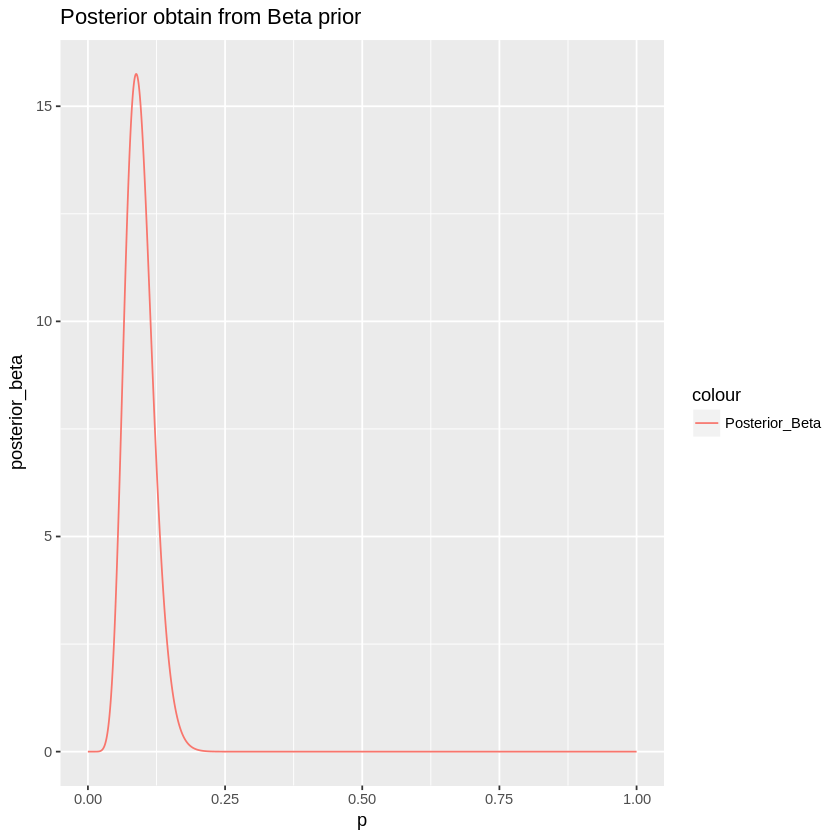

In [111]:
#p and interval
delta.t <- 0.0001
p <- seq(0, 1, by = delta.t) 

#likelihood, Prior
p.like_Beta <- dbinom(y, size=n, prob=p)
p.prior_Beta <- dbeta(p, 1, 10)

#Posterior
p.star_posterior_Beta <- p.like_Beta * p.prior_Beta #mnon normalize Posterior
p.posterior_Beta <- p.star_posterior_Beta/(delta.t * sum(p.star_posterior_Beta)) #normalize posterior

#Plot
ggplot() +
geom_line(aes(x=p, y=p.posterior_Beta, color='Posterior_Beta')) +
labs(x='p', y='posterior_beta', title='Posterior obtain from Beta prior')-> plot_posterior_Beta
plot_posterior_Beta

(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [112]:
# bayesian estimator for p 
mean_Beta <- (sum(p.posterior_Beta * p)) * delta.t
variance_Beta <- sum(((mean_Beta - p)^2) *p.posterior_Beta) * delta.t
lower_Beta <- ncredint(p, p.posterior_Beta, level=0.95)[['lower']]
upper_Beta <- ncredint(p, p.posterior_Beta, level=0.95)[['upper']]

result_beta <- tibble(
                mean = mean_Beta,
                variance = variance_Beta,
                lower_bound_credibility_interval = lower_Beta,
                upperr_bound_credibility_interval = upper_Beta
                )
result_beta

#plot
plot_posterior_Beta + 
geom_area(aes(x = p[p>lower_Beta & p<upper_Beta],
              y = p.posterior_Beta[p>lower_Beta & p<upper_Beta],   
              fill='Credibility interval'), alpha=0.3) +
geom_vline(aes(xintercept = mean_Beta), color='darkRed', linetype="dotdash") +
xlim(0, 0.2) +
labs(title='Zoom on the mean') -> plot_posterior_Beta_zoom

grid.arrange(grobs=list(plot_posterior_Beta, plot_posterior_Beta_zoom), nrow=2)

ERROR: Error in ncredint(p, p.posterior_Beta, level = 0.95): could not find function "ncredint"


(d) test the hypotesis

In [53]:
p_0 <- 0.1
cat('Is p=0.1 inside the 95% credibility interval?', p_0 > lower_Beta & p_0 < upper_Beta,', so I accept the null Hypotesis H_0 and refuse H_1.')

Is p=0.1 inside the 95% credibility interval? TRUE , so I accept the null Hypotesis H_0 and refuse H_1.

(e) find the frequentist estimator for p

In [54]:
y <- 9
n <- 165

p_freq <- y/n
cat('The frequentiest estimator for p is:', p_freq)

The frequentiest estimator for p is: 0.05454545

(f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.

,Mean,Variance,Lower_bound_credibility_interval,Upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
Prior: Beta,0.05681818,0.0003027677,0.0251,0.0914
Prior: Old posterior,0.07191781,0.0002278008,0.0436,0.1019


Warning message:
“Removed 7500 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 7500 rows containing missing values (`geom_line()`).”


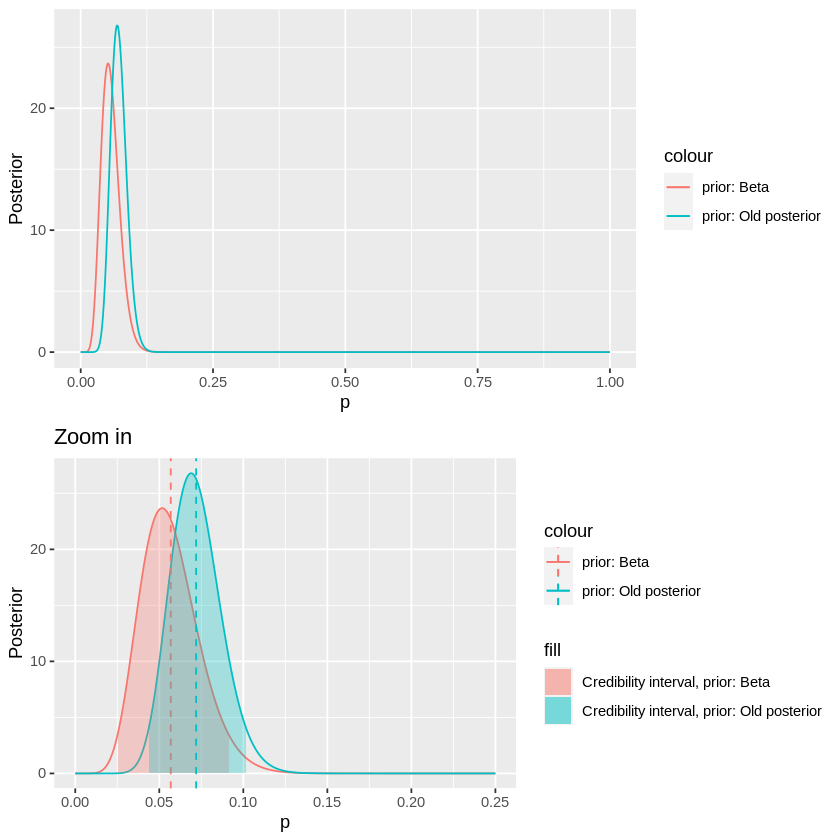

In [61]:
delta.t <- 0.0001
p <- seq(0,1, by=delta.t)

#likelihood
p.like <- dbinom(y, n, prob=p)

#the two prior
p.prior_beta <- dbeta(p, 1, 10)
p.prior_old <- p.posterior_Beta

#the two possible posterior 
p.post_star_beta <- p.like * p.prior_beta #non normalized posterior
p.post_beta <- p.post_star_beta / (delta.t * sum(p.post_star_beta))

p.post_star_old <- p.like * p.prior_old #non normalized posterior
p.post_old <- p.post_star_old / (delta.t * sum(p.post_star_old))

#find the two baiesian estimator for the two posterior 
mean_beta <- sum(p * p.post_beta) * delta.t
variance_beta <- sum(((p-mean_beta)^2) * p.post_beta) * delta.t
lower_beta <- ncredint(p, p.post_beta, level = 0.95)[['lower']]
upper_beta <- ncredint(p, p.post_beta, level = 0.95)[['upper']]
credibility_interval_beta <- c(lower_Beta, upper_Beta)


mean_old <- sum(p * p.post_old) * delta.t
variance_old <- sum(((p-mean_old)^2) * p.post_old) * delta.t
lower_old <- ncredint(p, p.post_old, level=0.95)[['lower']]
upper_old <- ncredint(p, p.post_old, level=0.95)[['upper']]
credibility_interval_old <- c(lower_old, upper_old) 

#print the result in a dataframe
result <- data.frame(
          Mean = c(mean_beta, mean_old),
          Variance = c(variance_beta, variance_old),
          Lower_bound_credibility_interval = c(lower_Beta, lower_old),
          Upper_bound_credibility_interval = c(upper_Beta, upper_old),
          row.names = c('Prior: Beta', 'Prior: Old posterior')
)
result

#plot the two posterior 
ggplot()+
geom_line(aes(p, p.post_beta, color='prior: Beta')) +
geom_line(aes(p, p.post_old, color='prior: Old posterior')) +
labs(x='p', y='Posterior') -> plot_two_prior

plot_two_prior +
geom_vline(aes(xintercept=mean_beta, color = 'prior: Beta', linetype='mean')) + 
geom_area(aes(x = p[p>lower_beta & p<upper_beta],
              y = p.post_beta[p>lower_beta & p<upper_beta],   
              fill='Credibility interval, prior: Beta'), alpha=0.3) +

geom_vline(aes(xintercept=mean_old, color='prior: Old posterior', linetype='mean')) +
geom_area(aes(x = p[p>lower_old & p<upper_old],
              y = p.post_old[p>lower_old & p<upper_old],   
              fill='Credibility interval, prior: Old posterior'), alpha=0.3) +
xlim(0, 0.25) + 
labs(title='Zoom in') -> plot_two_prior_zoom

grid.arrange(grobs=list(plot_two_prior, plot_two_prior_zoom), nrow=2)


(h) test the hypotesis at $\alpha$=5%

Is p = 0.1 inside the credibility interval for the posterior opatined with the Beta prior? FALSE so we accept the null hypotesis 
Is p = 0.1 inside the credibility interval for the posterior opatined with the old posterior as prior? TRUE so we reject the null hypotesis

Warning message:
“Removed 313 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 498 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 9551 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9551 rows containing missing values (`geom_line()`).”


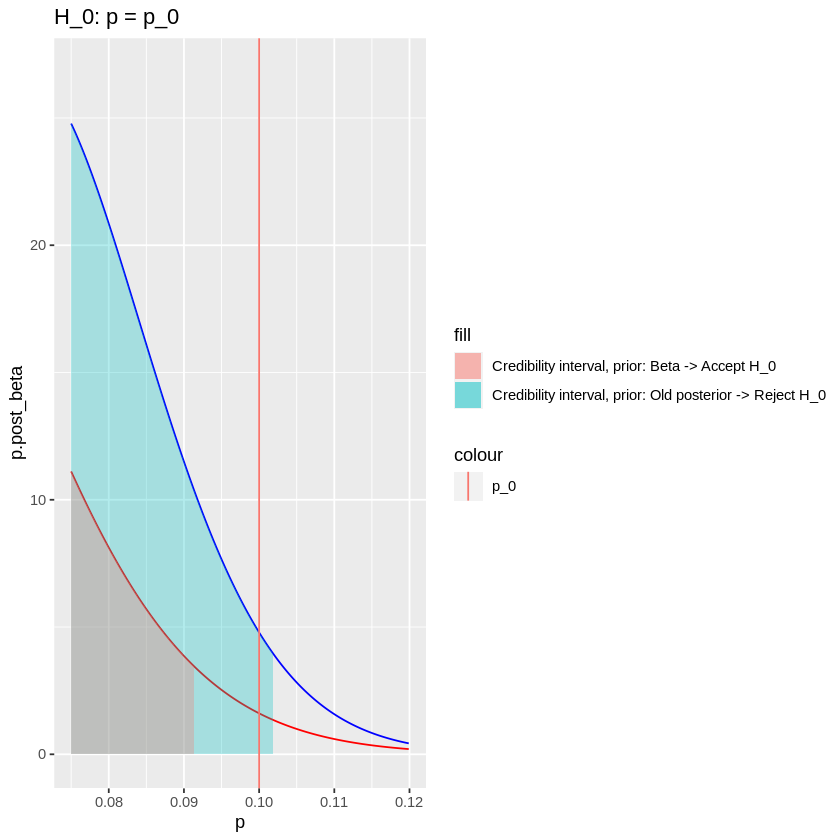

In [72]:
p_0 <- 0.1

cat('Is p = 0.1 inside the credibility interval for the posterior opatined with the Beta prior?', 
   p_0 > lower_Beta & p_0 < upper_Beta, 'so we accept the null hypotesis', '\n')
cat('Is p = 0.1 inside the credibility interval for the posterior opatined with the old posterior as prior?', 
   p_0 > lower_old & p_0 < upper_old, 'so we reject the null hypotesis')

ggplot()+
geom_line(aes(p, p.post_beta), color='red') +
geom_line(aes(p, p.post_old), , color='blue') +
geom_area(aes(x = p[p>lower_old & p<upper_old],
              y = p.post_old[p>lower_old & p<upper_old],   
              fill='Credibility interval, prior: Old posterior -> Reject H_0'), alpha=0.3) +
geom_area(aes(x = p[p>lower_beta & p<upper_beta],
              y = p.post_beta[p>lower_beta & p<upper_beta],   
              fill='Credibility interval, prior: Beta -> Accept H_0'), alpha=0.3) +
xlim(0.075, 0.12) + 
labs(title='H_0: p = p_0') +
geom_vline(aes(xintercept=0.1, color='p_0')) -> plot_twoprior_HT
plot_twoprior_HT

# Ex. 4

In [242]:
data <- NULL
data$X <- 11
data$n <- 116
data$n_next <- 10

model <- 's11_inf_p_pred.bug'
jm <- jags.model(model, data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model



In [243]:
update(jm, 1000)
chain <- coda.samples(jm, c('p', 'Y'), n.iter = 10000)
print(summary(chain))


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

    Mean     SD Naive SE Time-series SE
Y 0.9238 0.9424 0.009424       0.009822
p 0.0946 0.0261 0.000261       0.000261

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
Y 0.00000 0.00000 1.00000 1.0000 3.0000
p 0.05015 0.07574 0.09182 0.1112 0.1512



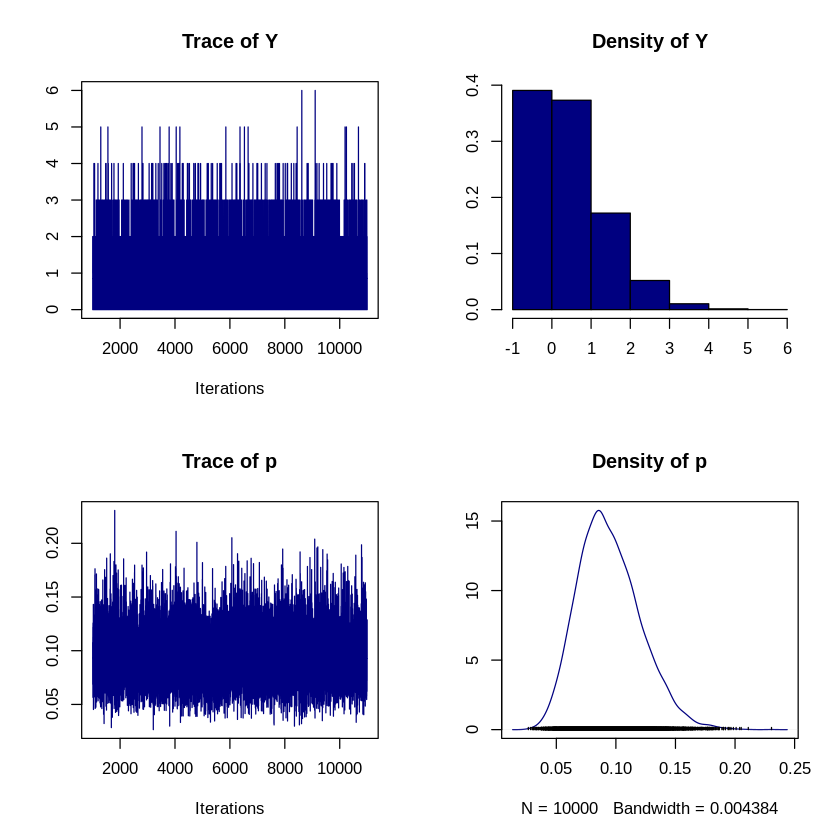

In [244]:
plot(chain, col='navy')

Correlation matrix:          Y         p
Y 1.0000000 0.2686234
p 0.2686234 1.0000000


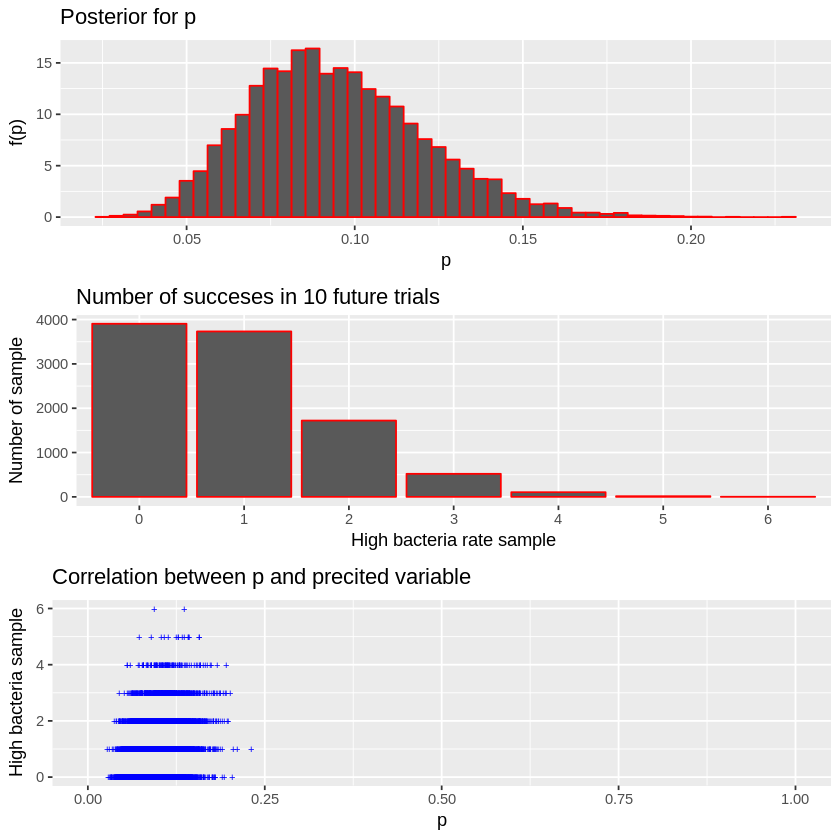

In [245]:
chain.df <- as.data.frame( as.mcmc(chain) )
cat(sprintf('Correlation matrix:'))
print(cor(chain.df))

#p inference result 
ggplot()+
geom_histogram(aes(x=chain.df$p, y=..density..), color='red', bins=50)+
labs(x='p', y='f(p)', title='Posterior for p') -> plot_inference_p

# next data prediction probability
ty <- as.data.frame(table(chain.df$Y))
ggplot()+
geom_bar(aes(x = ty$Var1, y=ty$Freq), color='red', stat = 'identity')+
labs(x='High bacteria rate sample', y='Number of sample', 
     title=sprintf('Number of succeses in %d future trials', data$n_next)) -> plot_next_data_prediction

#Correlation between p and predicted variable
ggplot(data=chain.df)+
geom_point(aes(x=p, y=Y), shape='+', size=2, color='blue')+
xlim(0, 1)+
labs(x='p', y='High bacteria sample', title ='Correlation between p and precited variable') -> plot_correlations

grid.arrange(grobs=list(plot_inference_p, plot_next_data_prediction, plot_correlations), nrow=3)

(b) Using a Beta(1, 10) posterior distribution P(p|y), calculate and plot posterior distribution P(p|y)

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”Warning message:
“Removed 8000 rows containing missing values (geom_path).”

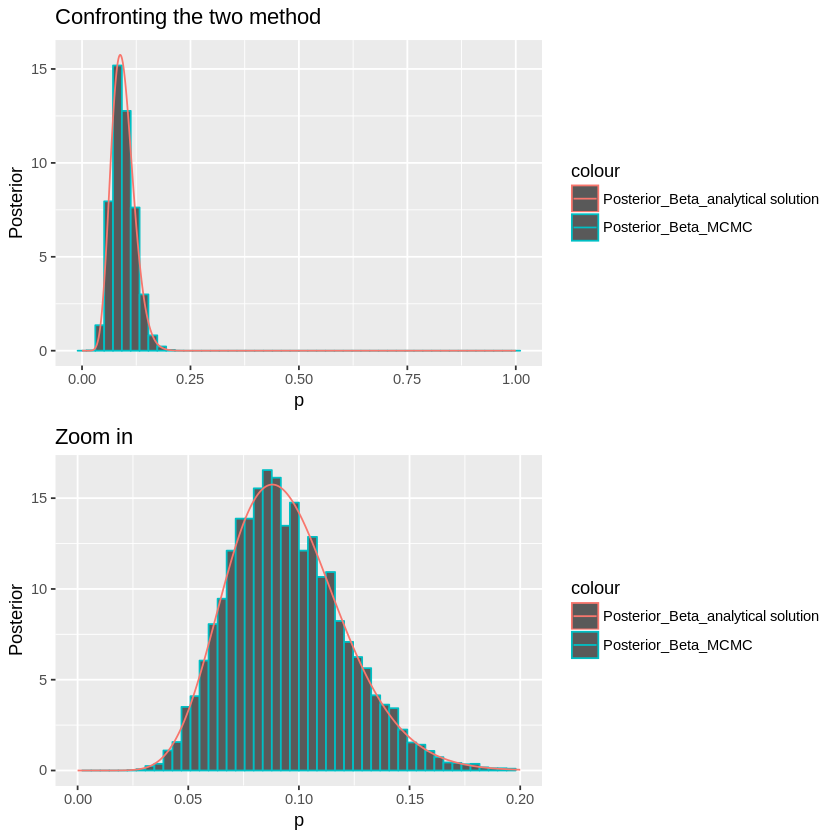

In [246]:
ggplot()+
geom_histogram(aes(x=chain.df$p, y=..density.., color='Posterior_Beta_MCMC'),  bins=50)+
geom_line(aes(x=p, y=p.posterior_Beta, color='Posterior_Beta_analytical solution'))+
labs(x='p', y='Posterior', title='Confronting the two method') -> plot_confrot_methods

plot_confrot_methods +
xlim(0, 0.2) +
labs(title='Zoom in')-> plot_confrot_methods_zoom

grid.arrange(grobs=list(plot_confrot_methods, plot_confrot_methods_zoom), nrow=2)

(c) find the bayesian estimator p, posterior mean and variance, and a 95% credibility interval

In [256]:
summary(chain)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

    Mean     SD Naive SE Time-series SE
Y 0.9238 0.9424 0.009424       0.009822
p 0.0946 0.0261 0.000261       0.000261

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
Y 0.00000 0.00000 1.00000 1.0000 3.0000
p 0.05015 0.07574 0.09182 0.1112 0.1512


In [260]:
cat('Mean for the posterior estimation MCMC:', 0.0946, '\n',
   'Variance for posterior estimation MCMC', (0.0261)^2)

Mean for the posterior estimation MCMC: 0.0946 
 Variance for posterior estimation MCMC 0.00068121

for the solution of the 95% interval the following link has been used: https://cran.r-project.org/doc/Rnews/Rnews_2006-1.pdf#page=7

In [250]:
sorted_chain <- chain.df[order(chain.df$p),]$p

lower_bound_MCMC <- as.double(sorted_chain[250]) 
upper_bound_MCMC <- as.double(sorted_chain[9750])
cat('lower bound credibility interval MCMC:', lower_bound_MCMC, '\n',
    'upper bound credibility interval MCMC:', upper_bound_MCMC)

lower bound credibility interval MCMC: 0.05013417 
 upper bound credibility interval MCMC: 0.1512227

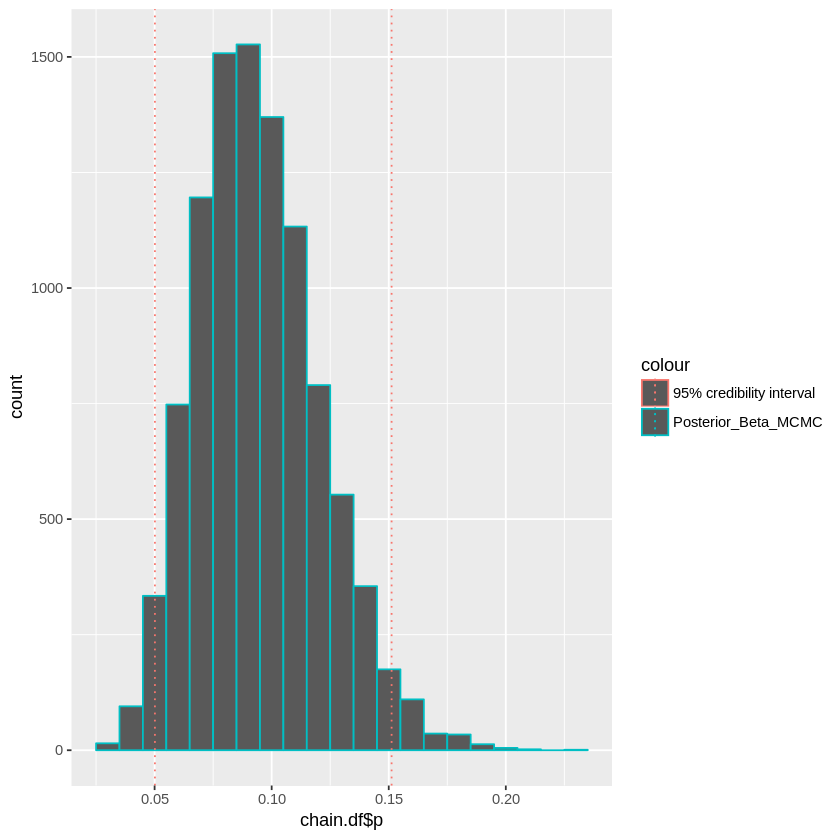

In [248]:
ggplot()+
geom_histogram(aes(x=chain.df$p, color='Posterior_Beta_MCMC'), binwidth = 0.01)+
geom_vline(aes(xintercept=lower_bound_MCMC, color='95% credibility interval'), linetype='dotted')+
geom_vline(aes(xintercept=upper_bound_MCMC, color='95% credibility interval'), linetype='dotted')
